In [1]:
import pandas as pd
import seaborn as sns
from seaborn import set_palette
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("dataset.csv")
print(len(df))

540364


In [3]:
def convert_room(x):
    if(str(x).upper() == 'A'):
        return 0
    if(str(x).upper() == 'B'):
        return 1
    if(str(x).upper() == 'C'):
        return 2
    else:
        return -1
df['room'] = df['room'].apply(convert_room)
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

In [4]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'datetime', 'hour', 'minute',
       'second', 'relative_time', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up', 'year', 'month'],
      dtype='object')

<AxesSubplot:>

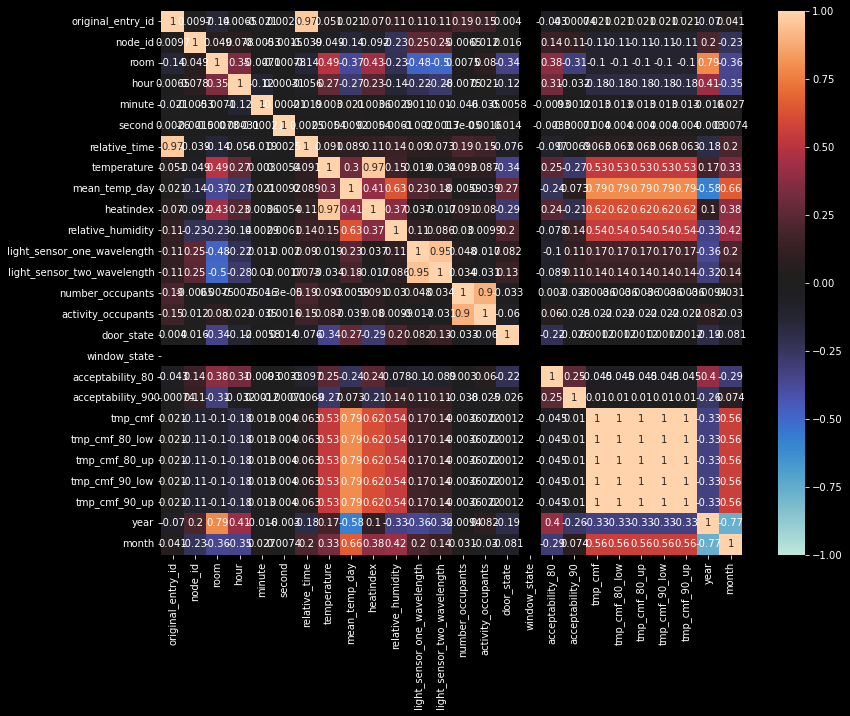

In [40]:
plt.rcParams["figure.figsize"] = (13,10)
mask = df[['original_entry_id', 'room', 
       'relative_time',  'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity',  'number_occupants', 'activity_occupants',
       'door_state','acceptability_80', 'acceptability_90', 
       'tmp_cmf', 
       'tmp_cmf_80_low', 
       'tmp_cmf_80_up', 
       'tmp_cmf_90_low']]
sns.heatmap(df.corr(method="spearman"), annot = True,  vmin =-1, vmax = 1, center = 0)

# Room

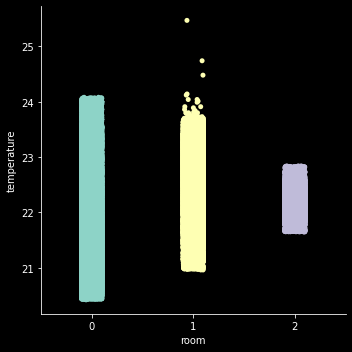

In [6]:
sns.catplot(x="room", y="temperature", data=df)

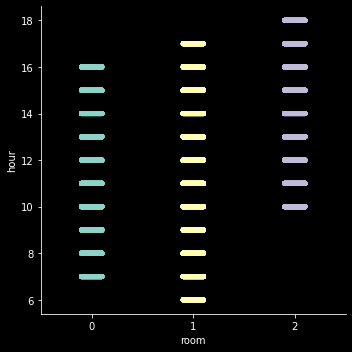

In [7]:
sns.catplot(x="room", y="hour", data=df)

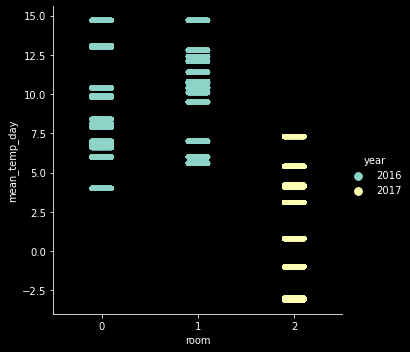

In [8]:
sns.catplot(x="room", y="mean_temp_day", data=df, hue="year")

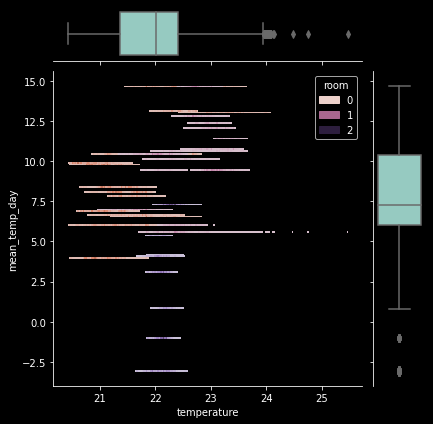

In [9]:
g = sns.JointGrid(data=df, x="temperature", y="mean_temp_day", hue="room")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

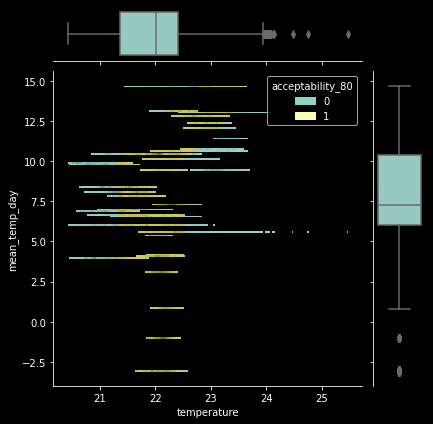

In [37]:
g = sns.JointGrid(data=df, x="temperature", y="mean_temp_day", hue="acceptability_80")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

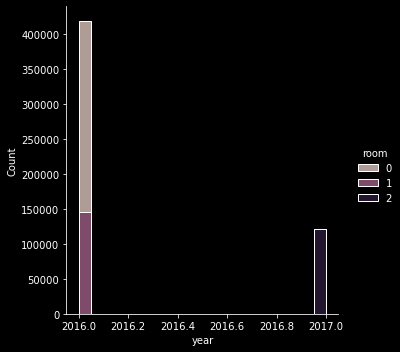

In [25]:
sns.displot(df, x="year", hue="room", multiple="stack")

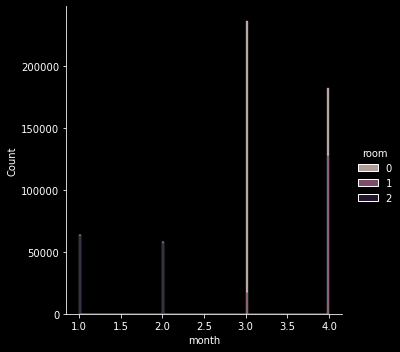

In [26]:
sns.displot(df, x="month", hue="room", multiple="stack")

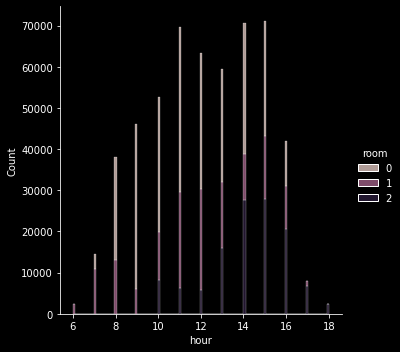

In [28]:
sns.displot(df, x="hour", hue="room", multiple="stack")

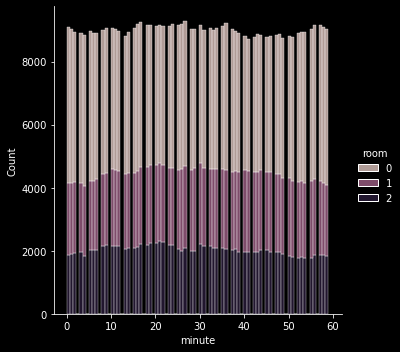

In [29]:
sns.displot(df, x="minute", hue="room", multiple="stack")

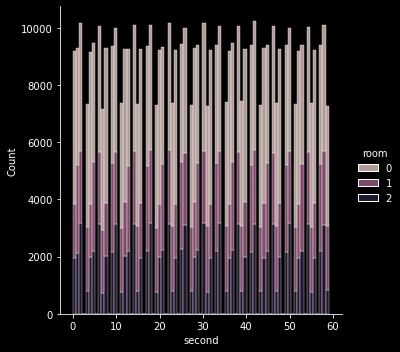

In [30]:
sns.displot(df, x="second", hue="room", multiple="stack")

# Heatindex

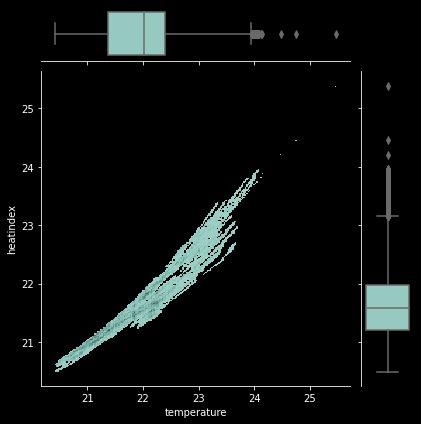

In [41]:
g = sns.JointGrid(data=df, x="temperature", y="heatindex")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

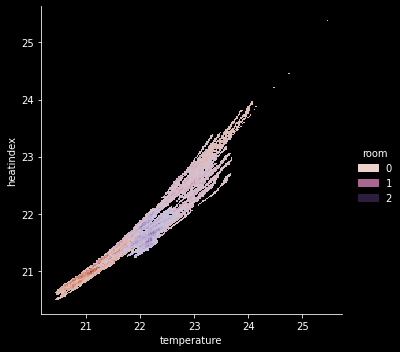

In [42]:
sns.displot(df, x="temperature", y="heatindex", hue="room")

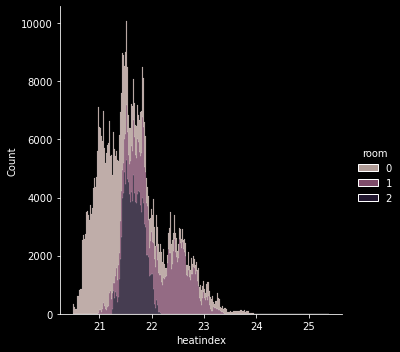

In [43]:
sns.displot(df, x="heatindex", hue="room", multiple="stack")

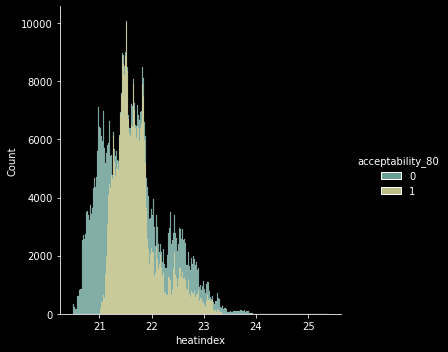

In [44]:
sns.displot(df, x="heatindex", hue="acceptability_80", multiple="stack")

# Temperature

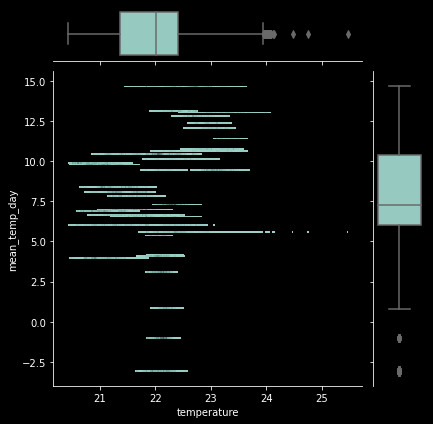

In [10]:
g = sns.JointGrid(data=df, x="temperature", y="mean_temp_day")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

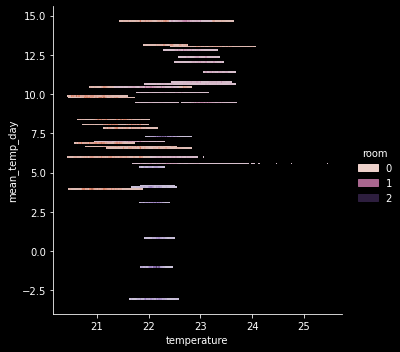

In [11]:
sns.displot(df, x="temperature", y="mean_temp_day", hue="room")

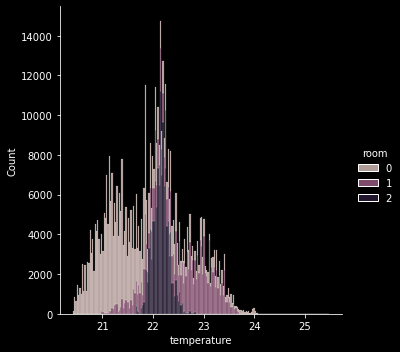

In [31]:
sns.displot(df, x="temperature", hue="room", multiple="stack")

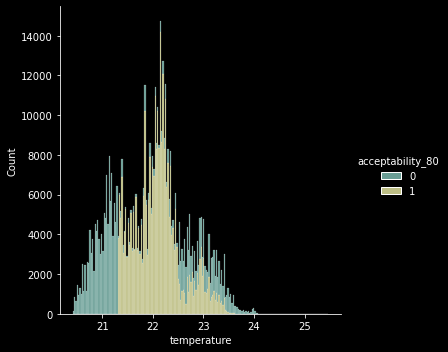

In [38]:
sns.displot(df, x="temperature", hue="acceptability_80", multiple="stack")

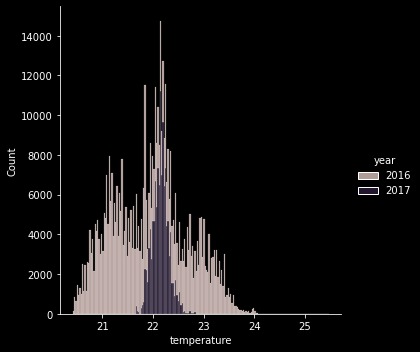

In [33]:
sns.displot(df, x="temperature", hue="year", multiple="stack")

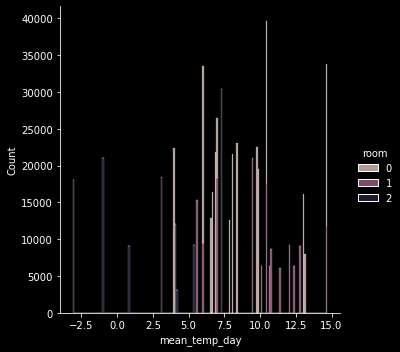

In [32]:
sns.displot(df, x="mean_temp_day", hue="room", multiple="stack")

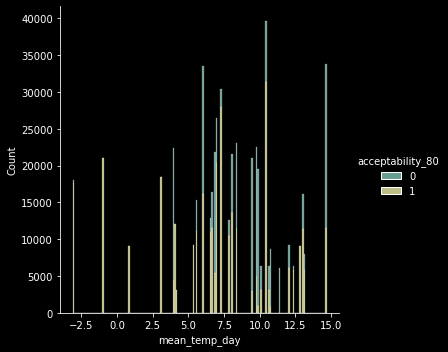

In [39]:
sns.displot(df, x="mean_temp_day", hue="acceptability_80", multiple="stack")

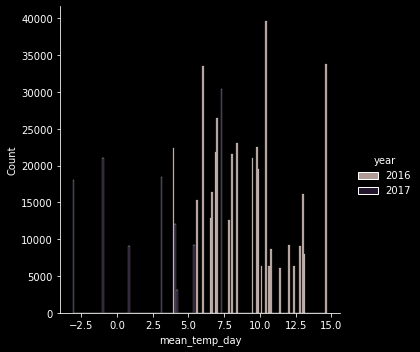

In [34]:
sns.displot(df, x="mean_temp_day", hue="year", multiple="stack")

# Temperature detailed

In [45]:
date_mean_2016 = df[df['year'] == 2016]
date_mean_2017 = df[df['year'] == 2017]

In [46]:
mean_dict_2016 = {}
for index, row in date_mean_2016.iterrows():
    month = row['month']
    if month not in mean_dict_2016:
        mean_dict_2016[month] = date_mean_2016[date_mean_2016['month'] == month]['temperature'].mean()


mean_dict_2017 = {}
for index, row in date_mean_2017.iterrows():
    month = row['month']
    if month not in mean_dict_2017:
        mean_dict_2017[month] = date_mean_2017[date_mean_2017['month'] == month]['temperature'].mean()        

mean_dict_both = {}
for index, row in df.iterrows():
    month = row['month']
    year = row['year']
    year_month = str(month) + "/" + str(year)
    if year_month not in mean_dict_both:
        month_frame = df[df['month'] == month] 
        year_frame = month_frame[month_frame['year'] == year] 
        mean_dict_both[year_month] =  year_frame['temperature'].mean()

In [ ]:
mean_dict_2017 = pd.DataFrame(data=mean_dict_2017.items(), columns=['datetime', 'mean'])
mean_dict_2016 = pd.DataFrame(data=mean_dict_2016.items(), columns=['datetime', 'mean'])
mean_dict = pd.DataFrame(data=mean_dict_both.items(), columns=['datetime', 'mean'])

In [ ]:
def create_year_column(row):
    if "2017" in row['datetime'] :
        return 2017
    else:
        return 2016

In [ ]:
mean_dict['year'] = mean_dict.apply(create_year_column, axis=1)

In [ ]:
sns.boxplot(y="temperature", data=df, x="year", hue="month")

In [ ]:
sns.boxplot(y="temperature", data=df, x="year")

In [ ]:
sns.boxplot(y="temperature", data=df, x="room", hue="year")

In [ ]:
sns.boxplot(y="temperature", data=df)